<a href="https://colab.research.google.com/github/tambakboii/machine-Learning_04_Athiyan-Aqil-Muhammad/blob/main/pertemuan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# praktikum 1

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

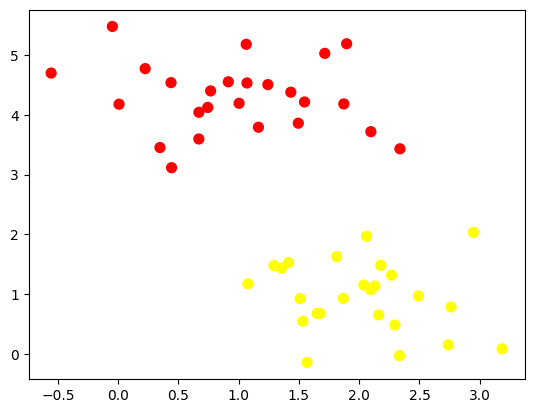

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

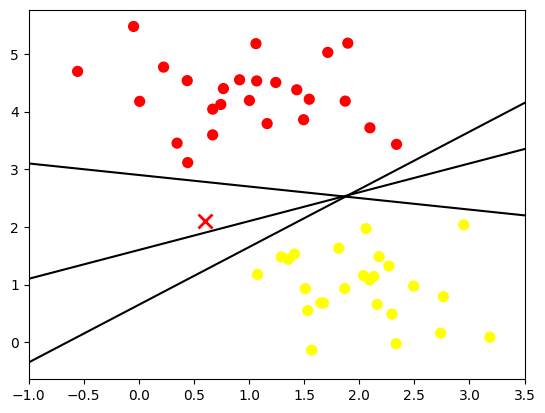

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

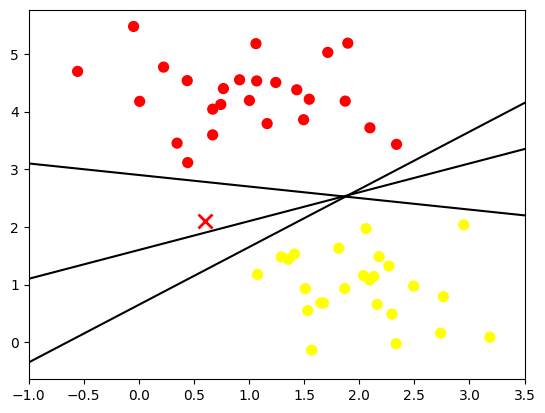

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

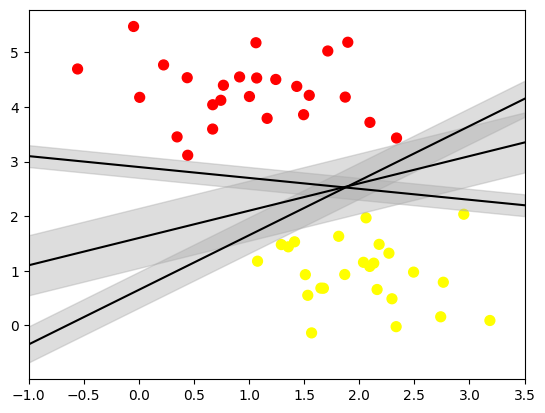

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

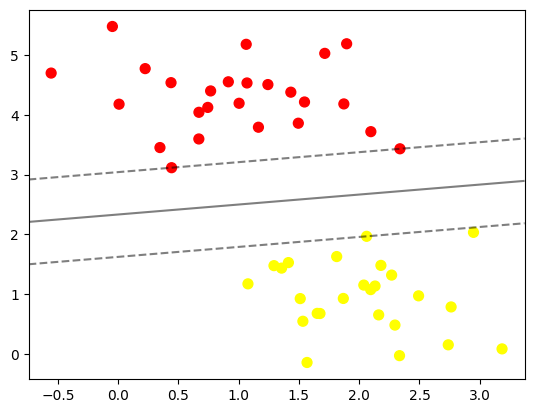

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [9]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

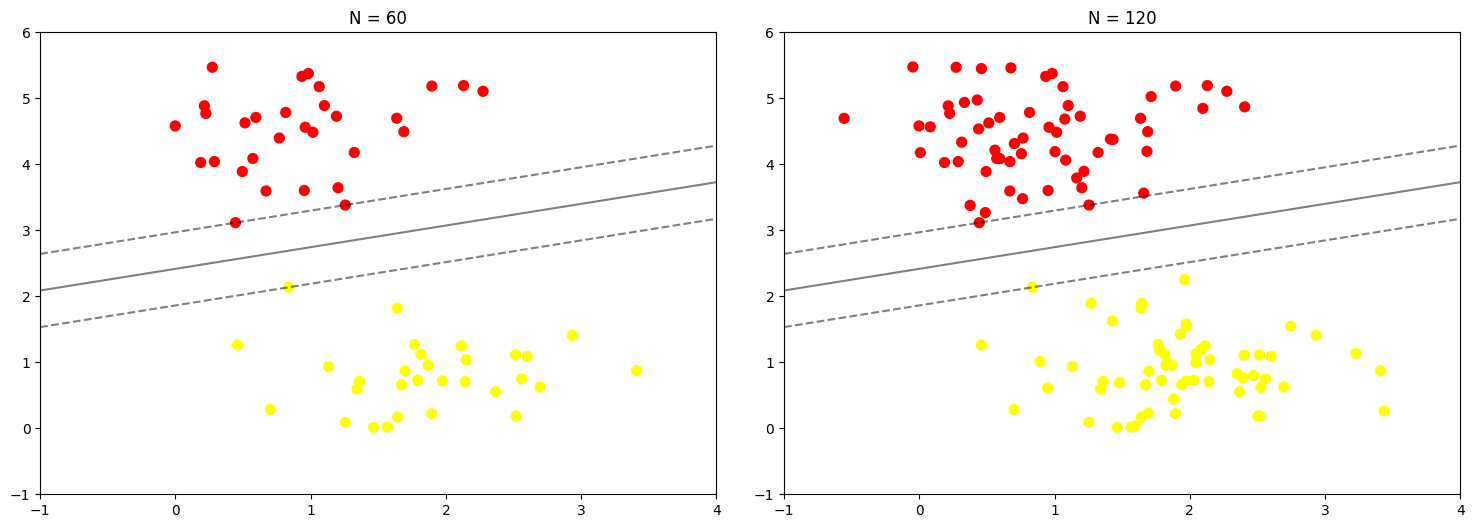

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

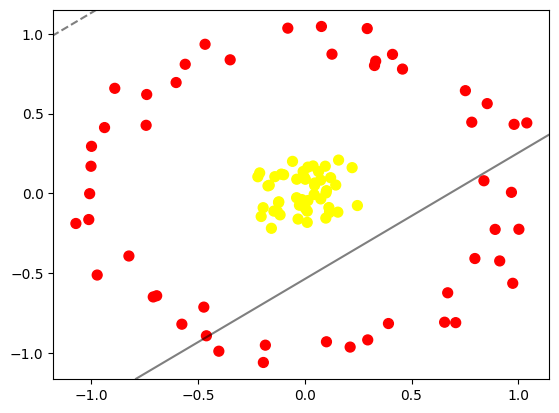

In [15]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [17]:
r = np.exp(-(X ** 2).sum(1))

In [19]:
!pip install ipywidgets
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# ... (your existing code) ...

def plot_3D(elev=30, azim=30, X=X, y=y):
    fig = plt.figure()  # Create a new figure for each interaction
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()  # Display the plot

# Use interact for interactive visualization
interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.19210571e-02, -1.10492720e-01],
       [-4.60310268e-01, -8.91393384e-01],
       [-1.44394369e-01, -1.10317387e-01],
       [ 8.54199176e-01,  5.62960657e-01],
       [-9.37098775e-01,  4.12891229e-01],
       [ 1.48463291e-02,  1.65117089e-01],
       [ 1.01710285e-01, -9.28931057e-01],
       [-4.02041718e-01, -9.87998231e-01],
       [-1.07122750e+00, -1.87946143e-01],
       [-8.89217374e-01,  6.58755163e-01],
       [-1.21413139e-01, -5.20298336e-02],
       [ 9.96146589e-02,  3.58062399e-03],
       [-1.84270245e-01, -9.50154028e-01],
       [-8.23058738e-01, -3.91685081e-01],
       [ 7.81369395e-02,  1.04614661e+00],
       [ 4.62245052e-02,  5.15283446e-02],
       [ 3.26587798e-01,  8.01607958e-01],
       [ 1.01864362e-01,  1.75458457e-02],
       [ 1.45158458e-01,  5.29990020e-02],
       [ 3.91929953e-01, -8.14686931e-01],
       [-1.94624376e-01, -8.90241829e-02],
       [ 7.81978631e-01,  4.46576132e-01],
       [ 2.46504454e-01, -7.55593412e-02],
       [-2.19498400e-01,  1.04820869e-01],
       [ 3.54390585e-03, -9.39119244e-02],
       [-1.93652681e-01, -1.05861493e+00],
       [-1.48462083e-02, -6.14164103e-02],
       [ 9.80118813e-01,  4.33009014e-01],
       [-4.66531159e-01,  9.34650221e-01],
       [ 9.73786780e-01, -5.62605909e-01],
       [-3.12097740e-02, -1.60270767e-01],
       [ 1.21250811e-01,  9.89586716e-02],
       [ 6.54775109e-01, -8.06381633e-01],
       [-3.73770528e-02,  8.93202174e-02],
       [ 1.17314841e-02, -1.80976858e-01],
       [-7.42437767e-01,  4.27066204e-01],
       [ 2.21865306e-01,  1.61834556e-01],
       [ 9.61193079e-02,  1.70912747e-01],
       [ 1.49333138e-02, -4.42747201e-02],
       [-6.93055741e-01, -6.40690493e-01],
       [ 1.15965710e-01, -1.18705148e-01],
       [-1.38554823e-02, -3.80411650e-02],
       [-3.49053067e-01,  8.37317300e-01],
       [ 7.45741899e-02,  8.38921204e-02],
       [-1.00047552e+00,  1.70519928e-01],
       [ 1.27561954e-01,  8.72639023e-01],
       [ 7.52114865e-01,  6.44126493e-01],
       [ 2.67585772e-03,  8.91570291e-02],
       [-4.72358408e-01, -7.11829860e-01],
       [ 6.48031693e-02,  1.36926030e-01],
       [ 1.58479530e-01,  2.09278262e-01],
       [-1.72132326e-01,  4.74969600e-02],
       [-7.09109742e-01, -6.48018312e-01],
       [-1.15416157e-01, -1.33954139e-01],
       [ 7.50497052e-02, -3.40222254e-02],
       [-1.09576653e-01,  1.21411349e-01],
       [-6.02061335e-01,  6.95010905e-01],
       [ 9.67641920e-01,  7.20154834e-03],
       [-7.39731639e-01,  6.20016017e-01],
       [ 2.94936467e-01, -9.17125078e-01],
       [ 4.72699467e-02,  6.57815279e-02],
       [ 2.12602209e-01, -9.62208365e-01],
       [ 1.55071907e-01, -1.16939112e-01],
       [ 1.03955540e+00,  4.42005242e-01],
       [-1.27461470e-01, -1.14461903e-01],
       [ 1.00255310e+00, -2.24158521e-01],
       [-2.03903965e-01, -1.44164976e-01],
       [ 4.57732803e-01,  7.79293152e-01],
       [ 7.96596901e-01, -4.07389360e-01],
       [ 2.92543713e-01,  1.03310893e+00],
       [-1.01087141e+00, -1.63257168e-01],
       [ 1.13077139e-01, -8.81327912e-02],
       [ 9.87354043e-02, -1.54208378e-01],
       [-7.91890428e-02,  1.03559434e+00],
       [ 7.06763121e-01, -8.09032424e-01],
       [-9.98085392e-01,  2.95263330e-01],
       [-7.45461576e-03,  1.37733153e-01],
       [-1.66078940e-01,  5.13428399e-02],
       [ 3.89885630e-02,  1.72365404e-01],
       [ 8.38868998e-01,  7.96502802e-02],
       [-5.71643679e-02,  2.01141649e-01],
       [ 8.91399114e-01, -2.24966182e-01],
       [-2.47670346e-02, -7.35881532e-02],
       [-9.88982821e-02,  1.17421687e-01],
       [-1.22554802e-01, -5.70763907e-02],
       [ 3.32121982e-01,  8.28961392e-01],
       [-2.16424542e-04,  9.65304679e-02],
       [-1.00679364e+00, -1.26422609e-03],
       [ 4.40587694e-02, -6.55263525e-03],
       [ 9.12743042e-01, -4.22510937e-01],
       [-5.59450110e-01,  8.09283739e-01],
       [-5.75134290e-01, -8.18857147e-01